In [2]:
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [18]:
s = """delta=0.1, Mean RMSE=0.4872, Variance RMSE=0.2216,  Without spinup: Mean RMSE=0.4431, Variance RMSE=0.0914
delta=0.2, Mean RMSE=0.7403, Variance RMSE=0.5992,  Without spinup: Mean RMSE=0.7038, Variance RMSE=0.5029
delta=0.3, Mean RMSE=0.8190, Variance RMSE=0.5793,  Without spinup: Mean RMSE=0.7741, Variance RMSE=0.4471
delta=0.4, Mean RMSE=0.7934, Variance RMSE=0.3486,  Without spinup: Mean RMSE=0.7474, Variance RMSE=0.2364
delta=2.5, Mean RMSE=0.9380, Variance RMSE=0.2790,  Without spinup: Mean RMSE=0.9026, Variance RMSE=0.1825
delta=2.8, Mean RMSE=0.8349, Variance RMSE=0.3118,  Without spinup: Mean RMSE=0.8056, Variance RMSE=0.2168
delta=3.1, Mean RMSE=0.8481, Variance RMSE=0.3047,  Without spinup: Mean RMSE=0.8189, Variance RMSE=0.2070
delta=3.4, Mean RMSE=0.9007, Variance RMSE=0.2922,  Without spinup: Mean RMSE=0.8686, Variance RMSE=0.2082"""

mean = []
var = []
for line in s.split('\n'):
    if line and 'RMSE' in line:
        mean.append(line.split()[2][5:-1])
        var.append(line.split()[4][5:-1])
        
mean = list(map(float, mean))
var = list(map(float, var))

In [19]:
mean

[0.4872, 0.7403, 0.819, 0.7934, 0.938, 0.8349, 0.8481, 0.9007]

In [20]:
var

[0.2216, 0.5992, 0.5793, 0.3486, 0.279, 0.3118, 0.3047, 0.2922]

In [21]:
bias_005_040 = {}
bias_005_040v = {}
bias_005_040['EnKF'] = [0.8642, 0.9084, 0.8994, 0.9834, 0.9683, 0.9520, 0.9612]
bias_005_040v['EnKF'] = [0.3224, 0.3172, 0.3941, 0.3792, 0.3832, 0.3935, 0.4006]
bias_005_040['EKF'] = [0.8819, 1.0778, 0.9350, 1.0073, 1.0434, 1.0327, 1.0969]
bias_005_040v['EKF'] = [0.3286, 0.4555, 0.4828, 0.4400, 0.5196, 0.4661, 0.7702]
bias_005_040['3DVar'] = [0.9080, 0.9892, 0.9547, 0.9658, 1.0157, 1.0816, 1.0908]
bias_005_040v['3DVar'] = [0.2854, 0.3226, 0.4264, 0.3425, 0.4008, 0.4314, 0.5736]
bias_005_040['4DVar'] = [0.6916, 0.7143, 0.6867, 0.7192, 0.7183, 0.7731, 0.8056]
bias_005_040v['4DVar'] = [0.2575, 0.2301, 0.2710, 0.2859, 0.2297, 0.2148, 0.3004]
#bias_005_040['3DEnVar'] = [0.8836, 0.859, 0.9294, 0.8132, 0.931, 0.9477, 1.0902]
#bias_005_040v['3DEnVar'] = [0.4184, 0.5607, 0.5188, 0.4524, 0.4763, 0.5996, 0.9933]
bias_005_040['3DEnVar'] = [0.8736, 0.9644, 0.907, 0.9111, 0.9881, 1.0178, 1.0506]
bias_005_040v['3DEnVar'] = [0.2849, 0.3652, 0.3593, 0.3398, 0.4148, 0.4524, 0.531]

bias_020_520 = {}
bias_020_520v = {}
bias_020_520['EnKF'] = [0.907, 0.9998, 1.1208, 1.1571, 1.1912, 1.4204, 1.6356, 1.8724, 1.911, 2.035, 2.3416, 2.4779, 2.799, 2.8261, 3.1179, 3.2614, 3.5196, 3.7895, 4.1223, 4.3796, 4.6367]
bias_020_520v['EnKF'] = [0.344, 0.4384, 0.4615, 0.5114, 0.5965, 0.5981, 0.8029, 1.1007, 1.0148, 1.1557, 1.3718, 1.4761, 1.9504, 1.8134, 2.0967, 2.7697, 2.4025, 3.5182, 4.1414, 5.0439, 4.8315]
bias_020_520['EKF'] = [1.0143, 1.1217, 1.3848, 1.2714, 1.4512, 1.6579, 2.0368, 2.3133, 2.3194, 2.4909, 2.8243, 2.9759, 3.3097, 3.3419, 3.7246, 3.6971, 3.9664, 4.2068, 4.5302, 4.6191, 4.8578]
bias_020_520v['EKF'] = [0.4703, 0.7206, 1.0175, 0.8174, 1.0849, 0.9565, 1.9261, 3.157, 2.663, 2.7506, 3.4429, 4.0886, 5.0119, 4.6921, 5.8807, 5.6132, 6.1026, 6.6548, 7.2044, 7.7992, 8.1795]
bias_020_520['3DVar'] = [1.0056, 1.1088, 1.3117, 1.3674, 1.5968, 1.8038, 2.1045, 2.4525, 2.4949, 2.7156, 3.022, 3.2426, 3.6553, 3.7124, 4.104, 4.093, 4.4052, 4.7173, 5.0932, 5.1963, 5.5124]
bias_020_520v['3DVar'] = [0.3929, 0.5301, 0.5716, 0.6316, 0.8505, 0.5541, 0.8225, 1.3605, 1.1673, 1.067, 1.1078, 1.4734, 1.8741, 1.7933, 1.9109, 1.9223, 2.2484, 2.5261, 2.6768, 2.9039, 3.0959]
bias_020_520['4DVar'] = [0.7487, 0.8244, 0.9693, 1.1693, 1.417, 1.6006, 1.7215, 1.9316, 2.2761, 2.4508, 2.6486, 2.9133, 3.0925, 3.331, 3.5876, 3.8136, 4.0245, 4.2144, 4.503, 4.6826, 4.9245]
bias_020_520v['4DVar'] = [0.2474, 0.2707, 0.2665, 0.2835, 0.346, 0.39, 0.4712, 0.4105, 0.7237, 0.5748, 0.7553, 0.7958, 1.0007, 0.9397, 1.3081, 1.4263, 1.3707, 1.687, 1.8869, 2.088, 2.1152]
#bias_020_520['3DEnVar'] = [0.9017, 1.0861, 1.3949, 1.3897, 1.5407, 1.9076, 2.3568, 2.6777, 2.6764, 2.9069, 3.3026, 3.4585, 3.8501, 3.9213, 4.4027, 4.3147, 4.6207, 4.923, 5.2828, 5.4217, 5.689]
#bias_020_520v['3DEnVar'] = [0.4424, 1.2313, 2.1056, 1.348, 1.8651, 1.6402, 3.2031, 4.7879, 4.0206, 4.3095, 5.1313, 5.9639, 6.9784, 6.7794, 7.4229, 7.516, 8.266, 8.6528, 9.4363, 10.055, 9.8114]
bias_020_520['3DEnVar'] = [0.9611, 1.0432, 1.2696, 1.3249, 1.5062, 1.7505, 2.076, 2.3987, 2.4949, 2.6501, 3.0184, 3.1844, 3.6163, 3.7149, 4.0398, 4.0255, 4.3491, 4.6401, 4.9864, 5.1426, 5.4166]
bias_020_520v['3DEnVar'] = [0.3433, 0.504, 0.7145, 0.6644, 0.8736, 0.6446, 1.0445, 1.6985, 1.5502, 1.3747, 1.6099, 1.9482, 2.6488, 2.6214, 2.7584, 2.7203, 3.021, 3.4108, 3.4814, 3.7167, 4.1085]


skew_015_135 = {}
skew_015_135v = {}
skew_015_135['EnKF'] = [0.8842, 0.8768, 0.8905, 0.8954, 0.823]
skew_015_135v['EnKF'] = [0.3067, 0.3619, 0.4277, 0.3132, 0.368]
skew_015_135['EKF'] = [0.9778, 1.0318, 0.9779, 0.993, 0.9279]
skew_015_135v['EKF'] = [0.4645, 1.0485, 0.6188, 0.5113, 0.5196]
skew_015_135['3DVar'] = [0.992, 0.9026, 0.9805, 0.9248, 0.8854]
skew_015_135v['3DVar'] = [0.3641, 0.3704, 0.4278, 0.3428, 0.3924]
skew_015_135['4DVar'] = [0.6748, 0.7345, 0.7008, 0.6469, 0.632]
skew_015_135v['4DVar'] = [0.2932, 0.2838, 0.2728, 0.1919, 0.2508]
#skew_015_135['3DEnVar'] = [0.7289, 0.7636, 1.0152, 0.8584, 0.9099]
#skew_015_135v['3DEnVar'] = [0.3061, 0.3774, 1.0217, 0.4194, 0.5711]
skew_015_135['3DEnVar'] = [0.8135, 0.8693, 0.9906, 0.8326, 0.9076]
skew_015_135v['3DEnVar'] = [0.2901, 0.276, 0.478, 0.3006, 0.355]


skew_130_330 = {}
skew_130_330v = {}
skew_130_330['EnKF'] = [0.9567, 0.8165, 0.8542, 0.8809, 0.913, 0.8631, 0.8281, 0.9411, 0.8676]
skew_130_330v['EnKF'] = [0.4694, 0.3393, 0.3353, 0.3723, 0.4297, 0.3535, 0.295, 0.3087, 0.3234]
skew_130_330['EKF'] = [1.0756, 0.8701, 0.9435, 0.962, 1.0121, 0.9221, 0.9524, 0.9839, 0.8396]
skew_130_330v['EKF'] = [0.5373, 0.4852, 0.4663, 0.4736, 0.5254, 0.4809, 0.4355, 0.4879, 0.3262]
skew_130_330['3DVar'] = [1.091, 0.8335, 0.8946, 0.9402, 0.9903, 0.9298, 0.9454, 0.9809, 0.9143]
skew_130_330v['3DVar'] = [0.4883, 0.3396, 0.3837, 0.3737, 0.4349, 0.3544, 0.3691, 0.3525, 0.3714]
skew_130_330['4DVar'] = [0.7239, 0.7236, 0.71, 0.712, 0.7083, 0.6767, 0.7319, 0.752, 0.688]
skew_130_330v['4DVar'] = [0.2402, 0.2857, 0.2674, 0.3145, 0.2632, 0.2401, 0.2935, 0.285, 0.242]
#skew_130_330['3DEnVar'] = [0.8912, 0.85, 0.8131, 0.7303, 0.8925, 0.9014, 0.821, 0.8366, 0.919]
#skew_130_330v['3DEnVar'] = [0.5405, 0.4748, 0.4008, 0.2781, 0.5707, 0.5501, 0.3661, 0.3491, 0.5129]
skew_130_330['3DEnVar'] = [1.0258, 0.7981, 0.8673, 0.881, 0.9407, 0.8877, 0.8752, 0.9438, 0.8617]
skew_130_330v['3DEnVar'] = [0.4363, 0.3358, 0.3553, 0.3402, 0.4447, 0.3404, 0.3078, 0.3252, 0.3123]


skew_015_135_10mean = {}
skew_015_135_10mean['EnKF'] = [0.8931, 0.9005, 0.9011, 0.9026, 0.8917]
skew_015_135_10mean['EKF'] = [0.9907, 0.9721, 0.9621, 0.9885, 0.9878]
skew_015_135_10mean['3DVar'] = [0.9514, 0.9665, 0.9366, 0.9350, 0.9365]
skew_015_135_10mean['4DVar'] = [0.6991, 0.7176, 0.7007, 0.6914, 0.7078]

skew_130_330_10mean = {}
skew_130_330_10mean['EnKF'] = [0.8975, 0.8875, 0.9019, 0.8989, 0.8870, 0.8900, 0.8882, 0.8915, 0.8933]
skew_130_330_10mean['EKF'] = [0.9382, 0.9998, 0.9843, 0.9962, 0.9741, 0.9769, 0.9889, 1.0010, 0.9862]
skew_130_330_10mean['3DVar'] = [0.9538, 0.9447, 0.9450, 0.9196, 0.9495, 0.9785, 0.9216, 0.9416, 0.9505]
skew_130_330_10mean['4DVar'] = [0.6967, 0.7126, 0.6965, 0.7069, 0.6944, 0.6850, 0.7020, 0.6862, 0.7005]

kurtosis_050_220 = {}
kurtosis_050_220v = {}
kurtosis_050_220['EnKF'] = [0.9233, 0.9108, 0.8728, 0.9052, 0.9042, 0.8991, 0.8433, 0.9513, 0.8653, 0.8812]
kurtosis_050_220v['EnKF'] = [0.4749, 0.3842, 0.3815, 0.3616, 0.3985, 0.3399, 0.3187, 0.3359, 0.31, 0.2736]
kurtosis_050_220['EKF'] = [1.0535, 0.8914, 0.9911, 0.9769, 0.9786, 1.0462, 0.9458, 1.0639, 0.9147, 0.9844]
kurtosis_050_220v['EKF'] = [0.5942, 0.3371, 0.4719, 0.4547, 0.4248, 0.7607, 0.3614, 0.5349, 0.3651, 0.5304]
kurtosis_050_220['3DVar'] = [1.0396, 0.9003, 0.9278, 0.9389, 0.9553, 0.9952, 0.8822, 1.0332, 0.9492, 0.9411]
kurtosis_050_220v['3DVar'] = [0.5601, 0.311, 0.379, 0.3232, 0.3721, 0.4398, 0.2734, 0.433, 0.2966, 0.276]
kurtosis_050_220['4DVar'] = [0.6888, 0.6851, 0.6626, 0.7002, 0.6652, 0.6753, 0.7096, 0.7248, 0.7058, 0.7287]
kurtosis_050_220v['4DVar'] = [0.2263, 0.2259, 0.2482, 0.3031, 0.2525, 0.2594, 0.2529, 0.2268, 0.2111, 0.2794]
#kurtosis_050_220['3DEnVar'] = [0.7269, 0.9132, 0.9424, 0.8299, 0.6879, 0.8042, 0.7841, 0.8749, 1.0088, 0.8932]
#kurtosis_050_220v['3DEnVar'] = [0.321, 0.8018, 0.552, 0.3408, 0.3003, 0.3515, 0.3169, 0.5522, 0.8713, 0.4401]
kurtosis_050_220['3DEnVar'] = [0.8195, 0.9159, 1.0084, 0.8885, 0.8951, 0.9072, 0.9246, 0.9012, 0.9417, 0.9593]
kurtosis_050_220v['3DEnVar'] = [0.308, 0.4393, 0.4825, 0.2973, 0.311, 0.3597, 0.3196, 0.342, 0.3421, 0.3699]

kurtosis_010_340 = {}
kurtosis_010_340v = {}
kurtosis_010_340['EnKF'] = [0.6634, 0.796, 0.8274, 0.8134, 0.8767, 0.8791, 0.8707, 0.9085]
kurtosis_010_340v['EnKF'] = [0.5508, 0.7412, 0.3839, 0.3817, 0.3606, 0.2967, 0.2509, 0.2982]
kurtosis_010_340['EKF'] = [0.8867, 1.0212, 0.9734, 0.8937, 0.9517, 0.8785, 0.9048, 1.0028]
kurtosis_010_340v['EKF'] = [1.0949, 1.42, 0.5849, 0.4273, 0.4681, 0.3662, 0.3907, 0.4979]
kurtosis_010_340['3DVar'] = [0.6356, 0.7713, 0.866, 0.8484, 0.9426, 0.9253, 0.9301, 0.9273]
kurtosis_010_340v['3DVar'] = [0.8448, 0.737, 0.7378, 0.3704, 0.3849, 0.3573, 0.3333, 0.2781]
kurtosis_010_340['4DVar'] = [0.5315, 0.6829, 0.6841, 0.6958, 0.6795, 0.6989, 0.7136, 0.6848]
kurtosis_010_340v['4DVar'] = [0.2544, 0.4552, 0.318, 0.298, 0.2726, 0.2485, 0.2612, 0.2334]
#kurtosis_010_340['3DEnVar'] = [0.3272, 0.7388, 0.7909, 0.7072, 0.9248, 0.8062, 0.8691, 0.867]
#kurtosis_010_340v['3DEnVar'] = [0.276, 1.2295, 0.6994, 0.451, 0.5303, 0.4469, 0.5268, 0.3314]
kurtosis_010_340['3DEnVar'] = [0.4872, 0.7403, 0.819, 0.7934, 0.938, 0.8349, 0.8481, 0.9007]
kurtosis_010_340v['3DEnVar'] = [0.2216, 0.5992, 0.5793, 0.3486, 0.279, 0.3118, 0.3047, 0.2922]

In [22]:
normal = {}
normal['EnKF'] = 0.9295539354804296
normal['EKF'] = 0.9408792138195026
normal['3DVar'] = 0.9437467280394009
normal['4DVar'] = 0.6674723544498343
#normal['3DEnVar'] = 0.8495597416751757
normal['3DEnVar'] = 0.8931456007445371

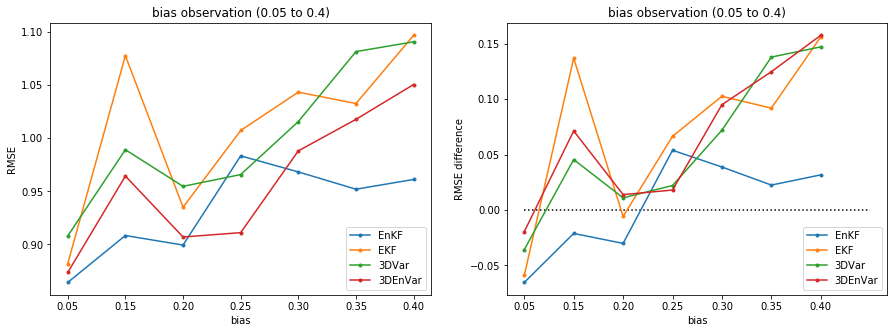

In [23]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

keys = ['0.05', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40']

for key, val in bias_005_040.items():
    if key != '4DVar':
        axs[0].plot(val, '.-', label=key)
axs[0].legend()
axs[0].set_xticks(list(range(len(keys))))
axs[0].set_xticklabels(keys)
axs[0].set_xlabel('bias')
axs[0].set_ylabel('RMSE')
axs[0].set_title('bias observation (0.05 to 0.4)')

for key, val in bias_005_040.items():
    if key != '4DVar':
        d = [v - normal[key] for v in val]
        axs[1].plot(d, '.-', label=key)
axs[1].hlines(0, xmin=0, xmax=len(keys), ls='dotted')
axs[1].legend()
axs[1].set_xticks(list(range(len(keys))))
axs[1].set_xticklabels(keys)
axs[1].set_xlabel('bias')
axs[1].set_ylabel('RMSE difference')
axs[1].set_title('bias observation (0.05 to 0.4)');

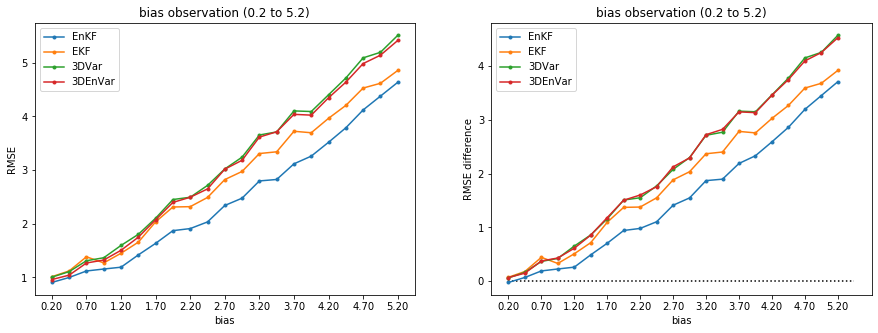

In [24]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

keys = pickle.load(open('./data/obs_bias_020_520.pickle', 'rb')).keys()

for key, val in bias_020_520.items():
    if key != '4DVar':
        axs[0].plot(val, '.-', label=key)
axs[0].legend()
axs[0].set_xticks(list(range(len(keys)))[::2])
axs[0].set_xticklabels(list(keys)[::2])
axs[0].set_xlabel('bias')
axs[0].set_ylabel('RMSE')
axs[0].set_title('bias observation (0.2 to 5.2)')

for key, val in bias_020_520.items():
    if key != '4DVar':
        d = [v - normal[key] for v in val]
        axs[1].plot(d, '.-', label=key)
axs[1].hlines(0, xmin=0, xmax=len(keys), ls='dotted')
axs[1].legend()
axs[1].set_xticks(list(range(len(keys)))[::2])
axs[1].set_xticklabels(list(keys)[::2])
axs[1].set_xlabel('bias')
axs[1].set_ylabel('RMSE difference')
axs[1].set_title('bias observation (0.2 to 5.2)');

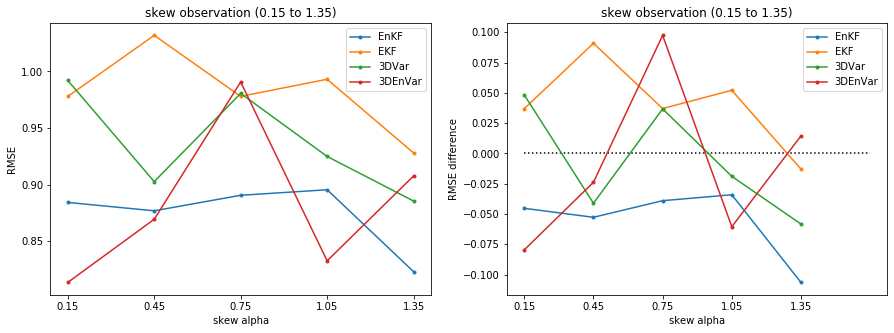

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

keys = pickle.load(open('./data/obs_skew_015_135.pickle', 'rb')).keys()

for key, val in skew_015_135.items():
    if key != '4DVar':
        axs[0].plot(val, '.-', label=key)
axs[0].legend()
axs[0].set_xticks(list(range(len(keys))))
axs[0].set_xticklabels(list(keys))
axs[0].set_xlabel('skew alpha')
axs[0].set_ylabel('RMSE')
axs[0].set_title('skew observation (0.15 to 1.35)')

for key, val in skew_015_135.items():
    if key != '4DVar':
        d = [v - normal[key] for v in val]
        axs[1].plot(d, '.-', label=key)
axs[1].hlines(0, xmin=0, xmax=len(keys), ls='dotted')
axs[1].legend()
axs[1].set_xticks(list(range(len(keys))))
axs[1].set_xticklabels(list(keys))
axs[1].set_xlabel('skew alpha')
axs[1].set_ylabel('RMSE difference')
axs[1].set_title('skew observation (0.15 to 1.35)');

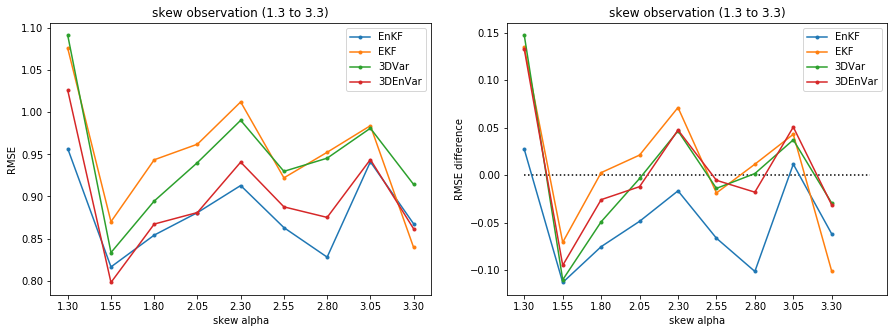

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

keys = pickle.load(open('./data/obs_skew_130_330.pickle', 'rb')).keys()

for key, val in skew_130_330.items():
    if key != '4DVar':
        axs[0].plot(val, '.-', label=key)
axs[0].legend()
axs[0].set_xticks(list(range(len(keys))))
axs[0].set_xticklabels(list(keys))
axs[0].set_xlabel('skew alpha')
axs[0].set_ylabel('RMSE')
axs[0].set_title('skew observation (1.3 to 3.3)')

for key, val in skew_130_330.items():
    if key != '4DVar':
        d = [v - normal[key] for v in val]
        axs[1].plot(d, '.-', label=key)
axs[1].hlines(0, xmin=0, xmax=len(keys), ls='dotted')
axs[1].legend()
axs[1].set_xticks(list(range(len(keys))))
axs[1].set_xticklabels(list(keys))
axs[1].set_xlabel('skew alpha')
axs[1].set_ylabel('RMSE difference')
axs[1].set_title('skew observation (1.3 to 3.3)');

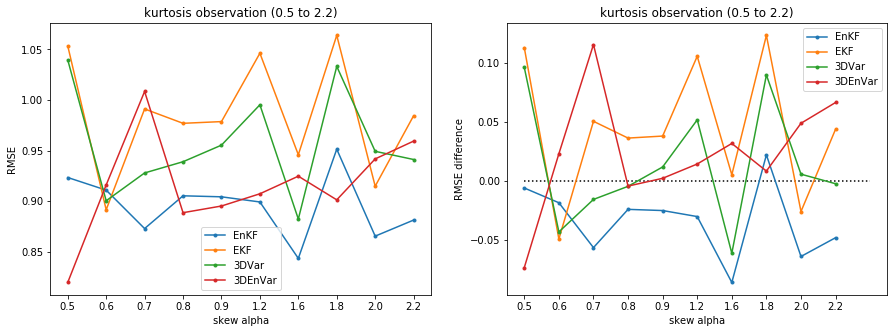

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

keys = pickle.load(open('./data/obs_kurtosis_050_220.pickle', 'rb')).keys()

for key, val in kurtosis_050_220.items():
    if key != '4DVar':
        axs[0].plot(val, '.-', label=key)
axs[0].legend()
axs[0].set_xticks(list(range(len(keys))))
axs[0].set_xticklabels(list(keys))
axs[0].set_xlabel('skew alpha')
axs[0].set_ylabel('RMSE')
axs[0].set_title('kurtosis observation (0.5 to 2.2)')

for key, val in kurtosis_050_220.items():
    if key != '4DVar':
        d = [v - normal[key] for v in val]
        axs[1].plot(d, '.-', label=key)
axs[1].hlines(0, xmin=0, xmax=len(keys), ls='dotted')
axs[1].legend()
axs[1].set_xticks(list(range(len(keys))))
axs[1].set_xticklabels(list(keys))
axs[1].set_xlabel('skew alpha')
axs[1].set_ylabel('RMSE difference')
axs[1].set_title('kurtosis observation (0.5 to 2.2)');

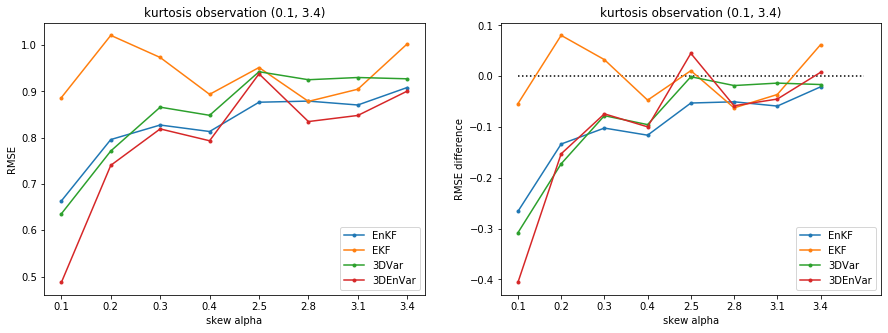

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

keys = pickle.load(open('./data/obs_kurtosis_010_340.pickle', 'rb')).keys()

for key, val in kurtosis_010_340.items():
    if key != '4DVar':
        axs[0].plot(val, '.-', label=key)
axs[0].legend()
axs[0].set_xticks(list(range(len(keys))))
axs[0].set_xticklabels(list(keys))
axs[0].set_xlabel('skew alpha')
axs[0].set_ylabel('RMSE')
axs[0].set_title('kurtosis observation (0.1, 3.4)')

for key, val in kurtosis_010_340.items():
    if key != '4DVar':
        d = [v - normal[key] for v in val]
        axs[1].plot(d, '.-', label=key)
axs[1].hlines(0, xmin=0, xmax=len(keys), ls='dotted')
axs[1].legend()
axs[1].set_xticks(list(range(len(keys))))
axs[1].set_xticklabels(list(keys))
axs[1].set_xlabel('skew alpha')
axs[1].set_ylabel('RMSE difference')
axs[1].set_title('kurtosis observation (0.1, 3.4)');

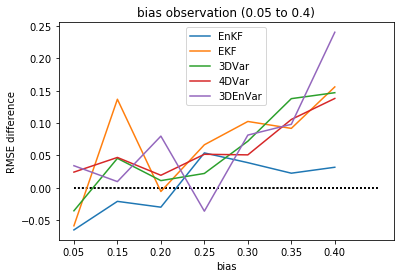

In [59]:
keys = ['0.05', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40']

for method in bias_005_040.keys():
    plt.plot(np.array(bias_005_040[method]) - normal[method], label=method)
    plt.legend()
    plt.xticks(list(range(len(keys))), keys)
    plt.xlabel('bias')
    plt.ylabel('RMSE difference')
    plt.title('bias observation (0.05 to 0.4)')
    plt.hlines(0, xmin=0, xmax=len(keys), ls='dotted');

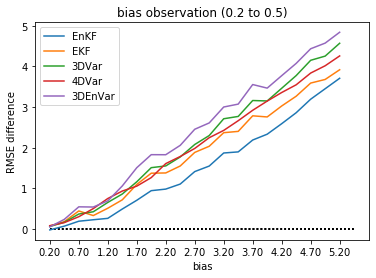

In [63]:
keys = pickle.load(open('./data/obs_bias_020_520.pickle', 'rb')).keys()
for method in bias_020_520.keys():
    plt.plot(np.array(bias_020_520[method]) - normal[method], label=method)
    plt.legend()
    plt.xticks(list(range(len(keys)))[::2], list(keys)[::2])
    plt.xlabel('bias')
    plt.ylabel('RMSE difference')
    plt.title('bias observation (0.2 to 0.5)')
    plt.hlines(0, xmin=0, xmax=len(keys), ls='dotted');

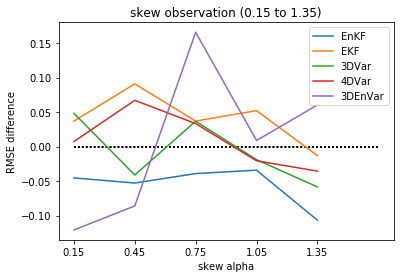

In [67]:
keys = pickle.load(open('./data/obs_skew_015_135.pickle', 'rb')).keys()
for method in skew_015_135.keys():
    plt.plot(np.array(skew_015_135[method]) - normal[method], label=method)
    plt.legend()
    plt.xticks(list(range(len(keys))), list(keys))
    plt.xlabel('skew alpha')
    plt.ylabel('RMSE difference')
    plt.title('skew observation (0.15 to 1.35)')
    plt.hlines(0, xmin=0, xmax=len(keys), ls='dotted');

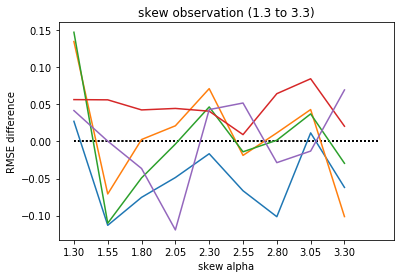

In [72]:
keys = pickle.load(open('./data/obs_skew_130_330.pickle', 'rb')).keys()
for method in skew_130_330.keys():
    plt.plot(np.array(skew_130_330[method]) - normal[method], label=method)
    plt.xticks(list(range(len(keys))), list(keys))
    plt.xlabel('skew alpha')
    plt.ylabel('RMSE difference')
    plt.title('skew observation (1.3 to 3.3)')
    plt.hlines(0, xmin=0, xmax=len(keys), ls='dotted');

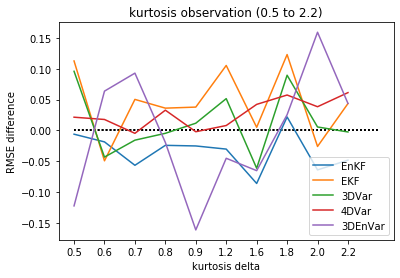

In [73]:
keys = pickle.load(open('./data/obs_kurtosis_050_220.pickle', 'rb')).keys()
for method in kurtosis_050_220.keys():
    plt.plot(np.array(kurtosis_050_220[method]) - normal[method], label=method)
    plt.legend()
    plt.xticks(list(range(len(keys))), list(keys))
    plt.xlabel('kurtosis delta')
    plt.ylabel('RMSE difference')
    plt.title('kurtosis observation (0.5 to 2.2)')
    plt.hlines(0, xmin=0, xmax=len(keys), ls='dotted');

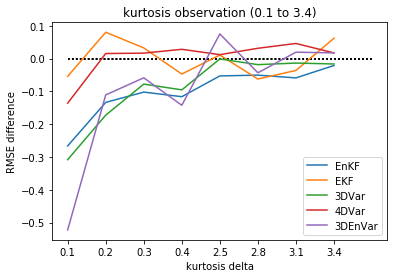

In [74]:
keys = pickle.load(open('./data/obs_kurtosis_010_340.pickle', 'rb')).keys()
for method in kurtosis_010_340.keys():
    plt.plot(np.array(kurtosis_010_340[method]) - normal[method], label=method)
    plt.legend()
    plt.xticks(list(range(len(keys))), list(keys))
    plt.xlabel('kurtosis delta')
    plt.ylabel('RMSE difference')
    plt.title('kurtosis observation (0.1 to 3.4)')
    plt.hlines(0, xmin=0, xmax=len(keys), ls='dotted');